# MTH 4224 / CSE 4224 - Homework 3

## Classification Models

**Deadline**: Mar 15

**Points**: 60

### Instructions

Submit **one** Python notebook file for grading. Your file must include **text explanations** of your work, **well-commented code**, and the **outputs** from your code.

### Datasets

For problems 1-5, use the [Heart Disease Data Set](https://archive.ics.uci.edu/dataset/45/heart+disease) of patients with and without heart disease. UCI Machine Learning Repository.

For problems 6-10, use the [Mushroom Dataset](https://archive.ics.uci.edu/dataset/73/mushroom) containing details on many types of mushrooms. UCI Machine Learning Repository.

### Problems

#### Heart Disease Classification

1. **[5 points]** Use pairplots to analyze the feature distributions and output labels. Note any strong patterns you observe. (Use only the 14 main features listed.)

2. **[10 points]** Do a comparison of the naive Bayes' classifier, logistic regression, LDA, QDA, and K-nearest neighbors on the same train/test split.

3. **[5 points]** Train a decision tree classifier to classify which people have heart disease and test it on a test set.

4. **[5 points]** Use cost-complexity pruning to simplify your tree as much as possible to maintain high validation accuracy and plot tree diagrams. Discuss what is intuitive (or not intuitive) about the trained model's decisionmaking process.

5. **[5 points]** Tune either a random forest or XGBoost classifier, and justify your choice of 1 algorithm over the other.

6. **[5 points]** Compute feature importance metrics by both mean decrease in impurity and by permutation importance. Which features do these two metrics and the plotted tree from Problem 4 agree are important? Does this seem practically meaningful?

#### Mushrooms. Edible or Poisonous?

7. **[5 points]** Preprocess the data into a form for use for classification. Note most features are categorical and will need to be modified into numerical representations.

8. **[5 points]** Train a decision tree classifier to classify which mushrooms are poisonous and test it on a test set.

9. **[5 points]** Use cost-complexity pruning to simplify your tree as much as possible to maintain high validation accuracy and plot tree diagrams. Discuss what is intuitive (or not intuitive) about the trained model's decisionmaking process.

10. **[10 points]** Train a XGBoost model to predict which mushrooms are poisonous and test it on a test set. Tune its hyperparameters to improve performance.

In [51]:
'''
    Importing all that are used.
'''

from ucimlrepo import fetch_ucirepo                     # Used for getching data

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split    # Preprocessing data

'''
    Various models used throughout assignment.
'''
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report # Output results

import matplotlib.pyplot as plt
import xgboost as xgb

import warnings

## Heart Disease Classification

In [52]:
'''
Read data in from UCI repository, code was taken from website.
'''

heart_disease = fetch_ucirepo(id=45)    # fetch dataset 
  
X = heart_disease.data.features         # data (as pandas dataframes) 
y = heart_disease.data.targets 

In [53]:
x_copy = X.copy()                  # Making copy of dataset
x_copy['num'] = y.to_numpy()       # Create one single dataframe
x_copy.replace('NaN', np.nan, inplace=True)
x_cleaned = x_copy.dropna()        # Remove all missing data from dataset

full_df = x_cleaned

y_cleaned = x_cleaned['num']       # Reassign resulting data 
x_cleaned = x_cleaned.drop(columns='num')

1. **[5 points]** Use pairplots to analyze the feature distributions and output labels. Note any strong patterns you observe. (Use only the 14 main features listed.)

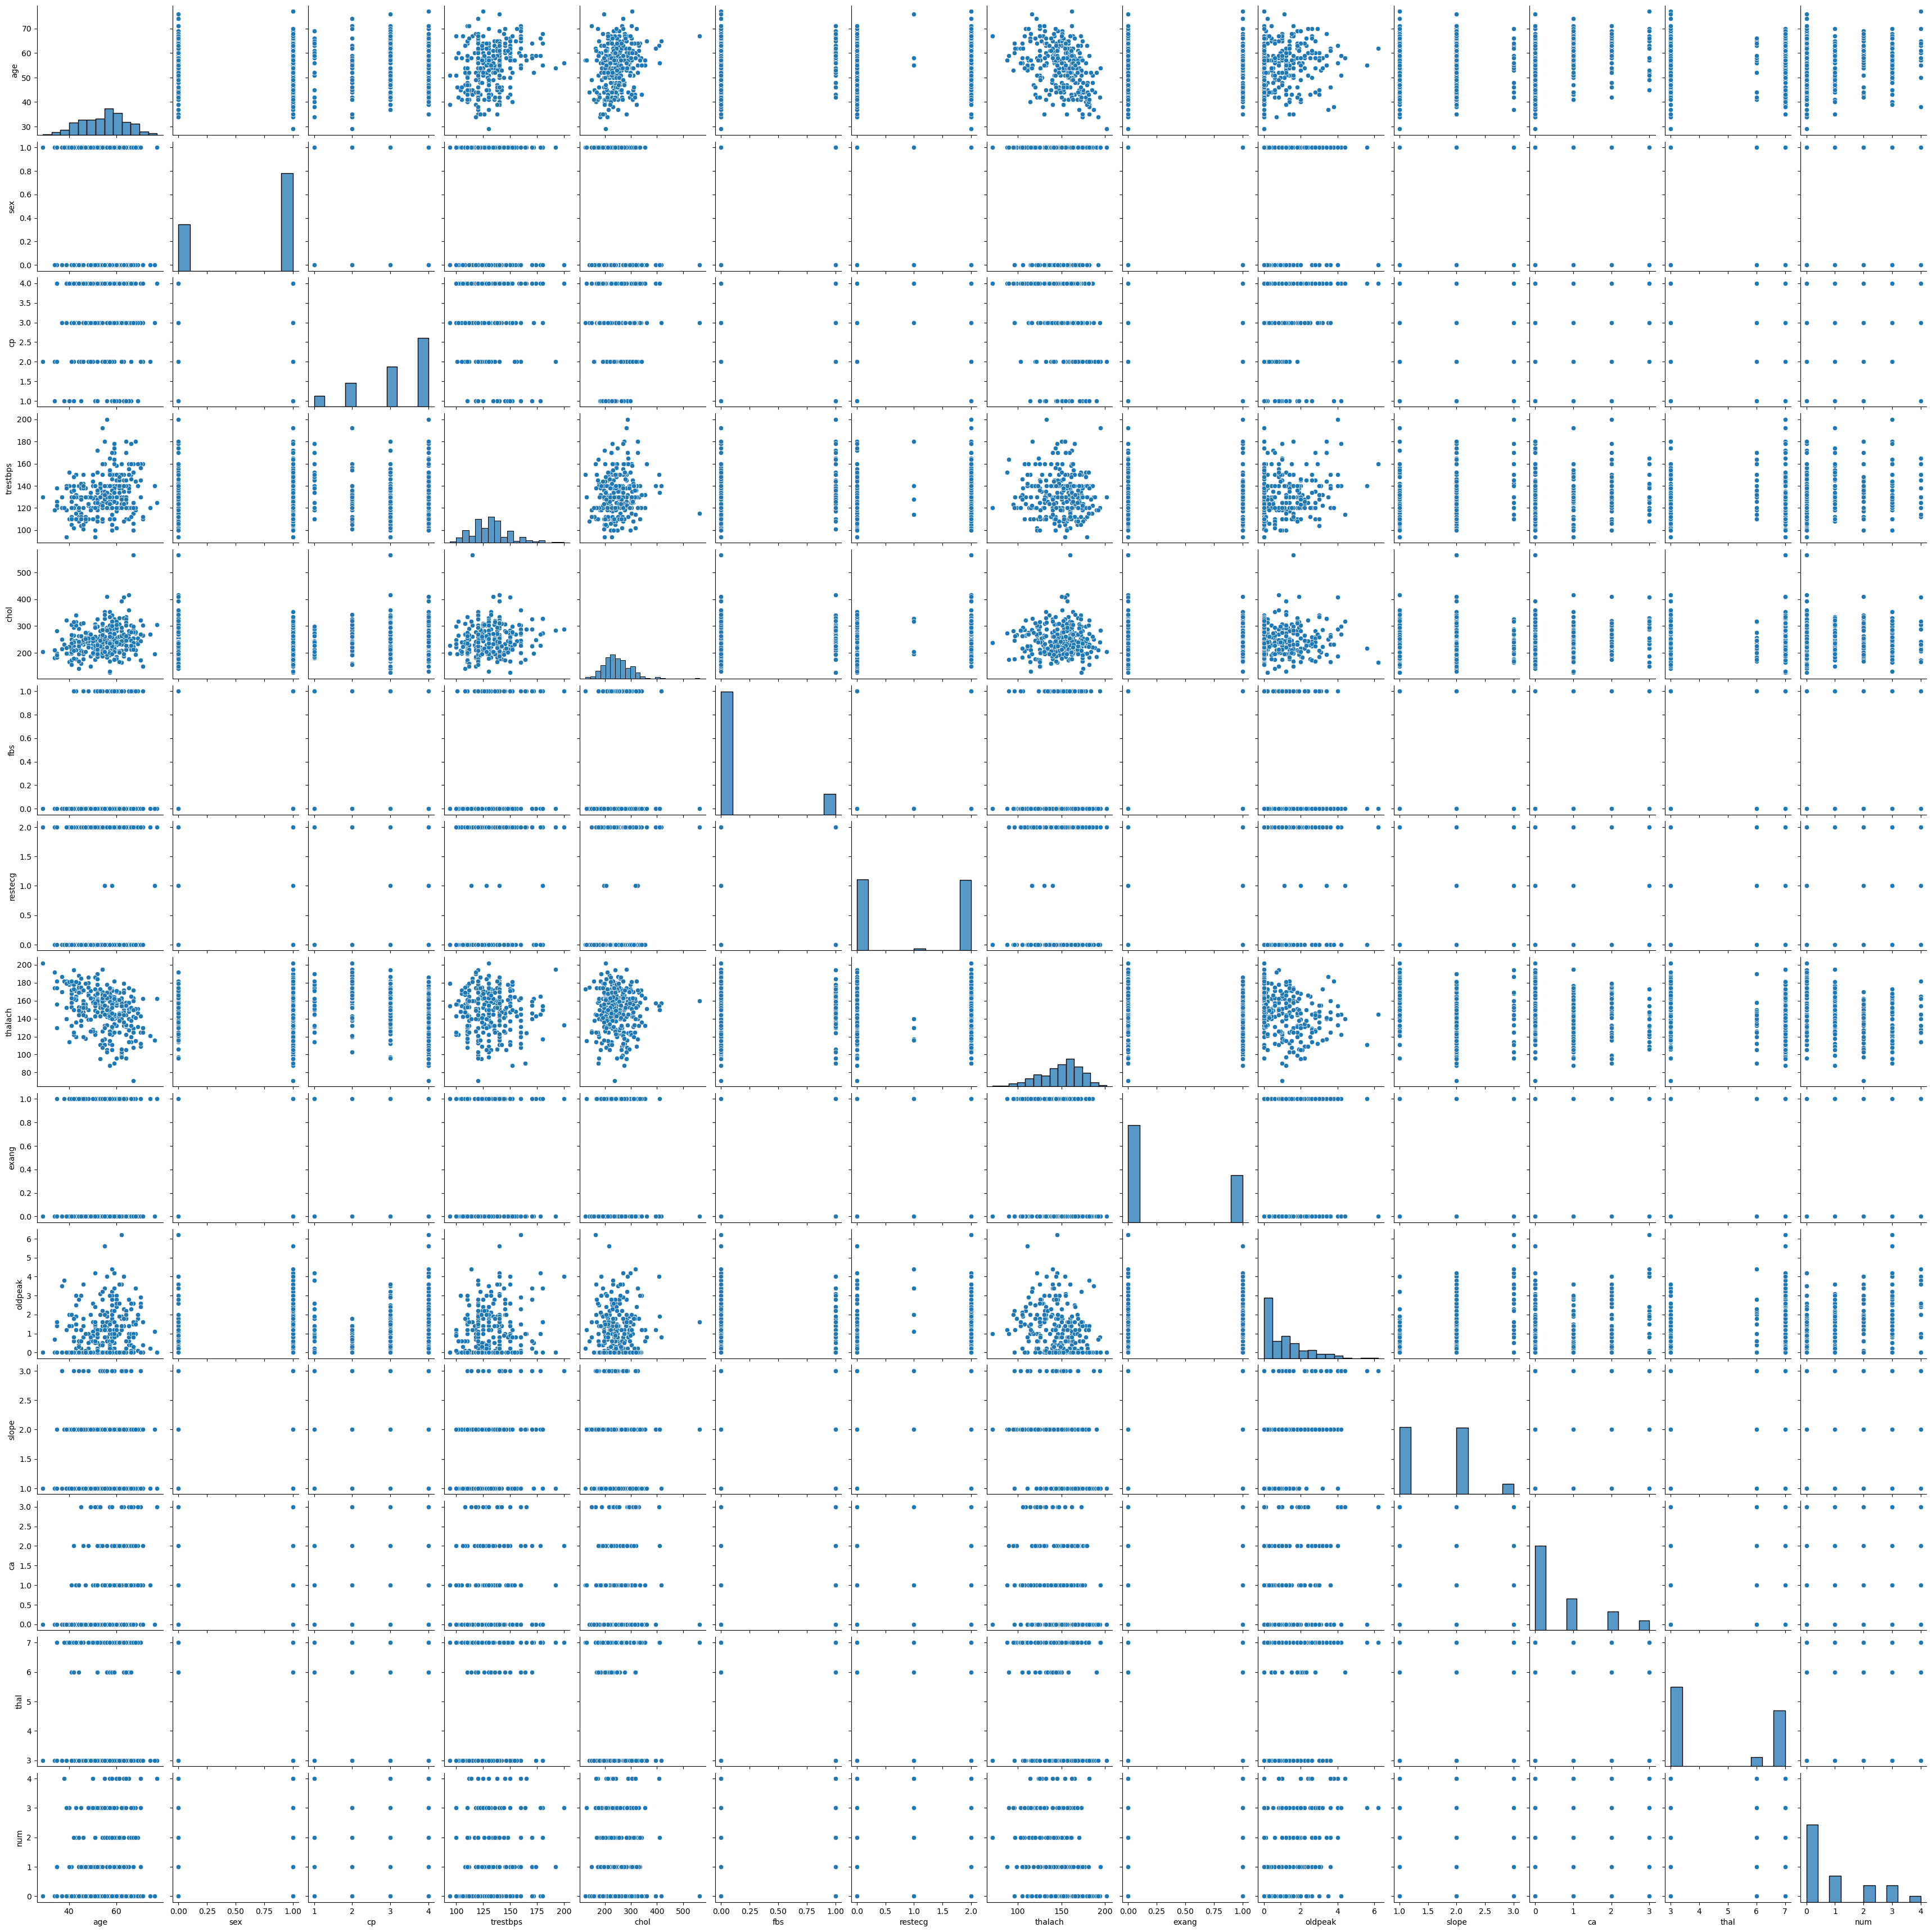

In [54]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
sns.pairplot(full_df)
plt.savefig('pairplots.png')

### Noting any patterns in data.

In the above plots or the plots in the pairplots.png file we can clearly see there are some patterns in the data. We can see some consistent lines in a lot of the plots as well as some pretty heavy clustering in others. Primarily focusing on the variables that are plotted against the num variable, there isn't too much of a correlation between all of the data. We don't really see much clustering in the data for these values, the data is very sparse.

2. **[10 points]** Do a comparison of the naive Bayes' classifier, logistic regression, LDA, QDA, and K-nearest neighbors on the same train/test split.


In [55]:
'''
    Splitting cleaned dataset into train, test, and validation set.
'''

train_x, test_x, train_y, test_y = train_test_split(x_cleaned, y_cleaned, test_size=0.4, random_state=0)
val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.5, random_state=0)

### Testing variety of classifiers.

In [56]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

bayes = GaussianNB()    # Naive Bayes' Classifer
bayes_model = bayes.fit(train_x, train_y)
bayes_prediction = bayes_model.predict(test_x)

lr = LogisticRegression()   # Logistic Regression Classifier
lr_model = lr.fit(train_x, train_y)
lr_prediction = lr_model.predict(test_x)

lda = LinearDiscriminantAnalysis()  
lda_model = lda.fit(train_x, train_y)
lda_prediction = lda_model.predict(test_x)

qda = QuadraticDiscriminantAnalysis()
qda_model = qda.fit(train_x, train_y)
qda_prediction = qda_model.predict(test_x)

neighbor = KNeighborsClassifier()
neighbor_model = neighbor.fit(train_x, train_y)
neighbor_prediction = neighbor_model.predict(test_x)

'''
    Output the name of the classifier as well as the classification report and the
    accuracy of the model.
'''
print('Naive Bayes Classification Report')
print(classification_report(test_y, bayes_prediction))
print('Naive Bayes Accuracy Score: ' + str(accuracy_score(test_y, bayes_prediction)) + '\n')

print('Logistic Regression Classification Report')
print(classification_report(test_y, lr_prediction))
print('Logistic Regression Accuracy Score: ' + str(accuracy_score(test_y, lr_prediction)) + '\n')

print('Linear Discrimnatnt Analysis Classification Report')
print(classification_report(test_y, lda_prediction))
print('Linear Discrimnatnt Analysis Accuracy Score: ' + str(accuracy_score(test_y, lda_prediction)) + '\n')

print('Quadratic Discriminant Analysis Classification Report')
print(classification_report(test_y, qda_prediction))
print('Quadratic Discriminant Analysis Accuracy Score: ' + str(accuracy_score(test_y, qda_prediction)) + '\n')

print('K-nearest Neighbor Classification Report')
print(classification_report(test_y, neighbor_prediction))
print('K-nearest Neighbor Accuracy Score: ' + str(accuracy_score(test_y, neighbor_prediction)) + '\n')

Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        28
           1       0.17      0.08      0.11        13
           2       0.00      0.00      0.00         7
           3       0.14      0.17      0.15         6
           4       0.14      0.17      0.15         6

    accuracy                           0.50        60
   macro avg       0.25      0.27      0.26        60
weighted avg       0.44      0.50      0.46        60

Naive Bayes Accuracy Score: 0.5

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.68      0.96      0.79        28
           1       0.00      0.00      0.00        13
           2       0.33      0.43      0.38         7
           3       0.14      0.17      0.15         6
           4       0.00      0.00      0.00         6

    accuracy                           0.52        60
   macro avg       0.2

3. **[5 points]** Train a decision tree classifier to classify which people have heart disease and test it on a test set.


Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.30      0.23      0.26        13
           2       0.33      0.43      0.38         7
           3       0.00      0.00      0.00         6
           4       0.33      0.17      0.22         6

    accuracy                           0.50        60
   macro avg       0.34      0.33      0.33        60
weighted avg       0.48      0.50      0.49        60



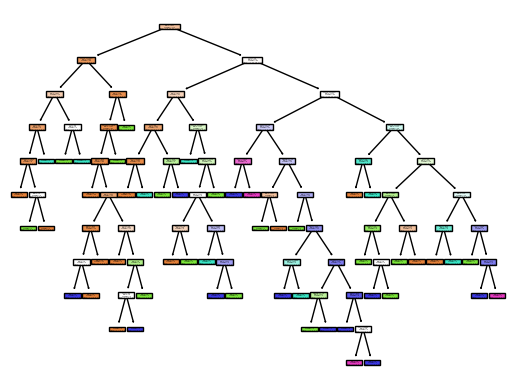

In [57]:
dtc = DecisionTreeClassifier(random_state=0)
model = dtc.fit(train_x, train_y)
predict = model.predict(test_x)

print('Decision Tree Classifier Classification Repoprt: ')
print(classification_report(test_y, predict))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()


4. **[5 points]** Use cost-complexity pruning to simplify your tree as much as possible to maintain high validation accuracy and plot tree diagrams. Discuss what is intuitive (or not intuitive) about the trained model's decisionmaking process.

In [59]:
'''
    Calculating alphas and impurties from training data.
'''

path = dtc.cost_complexity_pruning_path(train_x, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

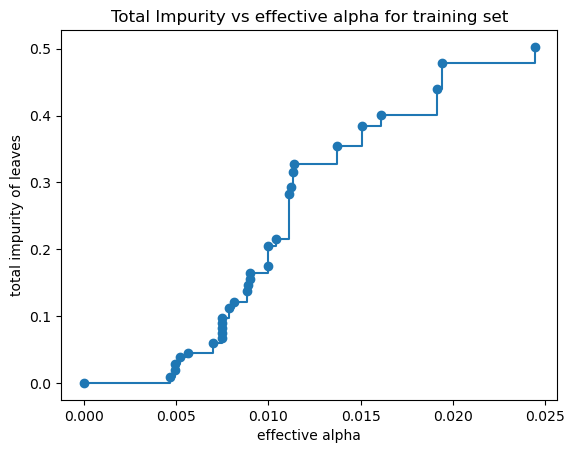

In [60]:
# plotting the impurities for different alphas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.30      0.23      0.26        13
           2       0.33      0.43      0.38         7
           3       0.00      0.00      0.00         6
           4       0.33      0.17      0.22         6

    accuracy                           0.50        60
   macro avg       0.34      0.33      0.33        60
weighted avg       0.48      0.50      0.49        60

Alpha: 0.0


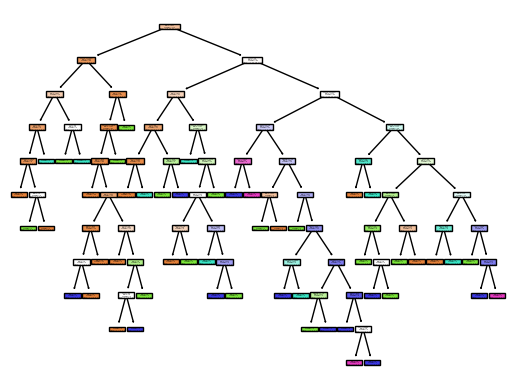

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.30      0.23      0.26        13
           2       0.33      0.43      0.38         7
           3       0.00      0.00      0.00         6
           4       0.33      0.17      0.22         6

    accuracy                           0.50        60
   macro avg       0.34      0.33      0.33        60
weighted avg       0.48      0.50      0.49        60

Alpha: 0.0046816479400749065


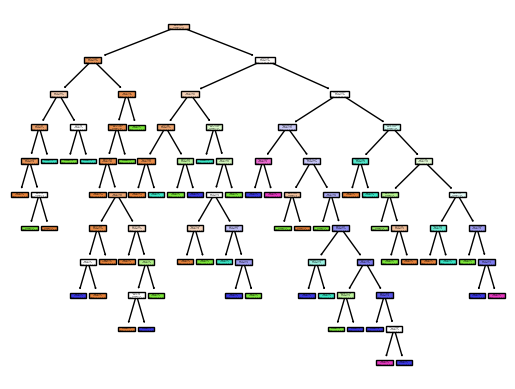

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.30      0.23      0.26        13
           2       0.33      0.43      0.38         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.48        60
   macro avg       0.28      0.30      0.28        60
weighted avg       0.45      0.48      0.46        60

Alpha: 0.0049157303370786515


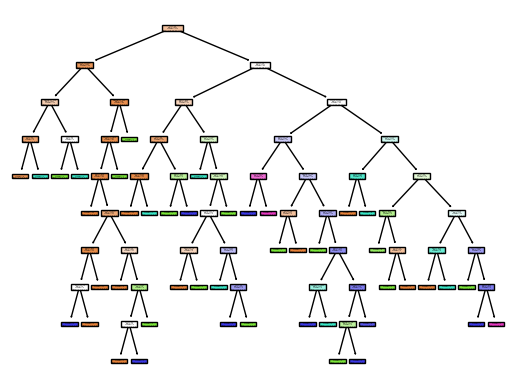

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.30      0.23      0.26        13
           2       0.33      0.43      0.38         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.48        60
   macro avg       0.28      0.30      0.28        60
weighted avg       0.45      0.48      0.46        60

Alpha: 0.0049157303370786515


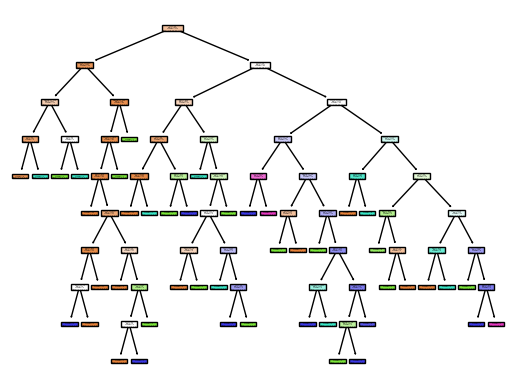

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.30      0.23      0.26        13
           2       0.33      0.43      0.38         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.48        60
   macro avg       0.27      0.30      0.28        60
weighted avg       0.44      0.48      0.46        60

Alpha: 0.00518582541054451


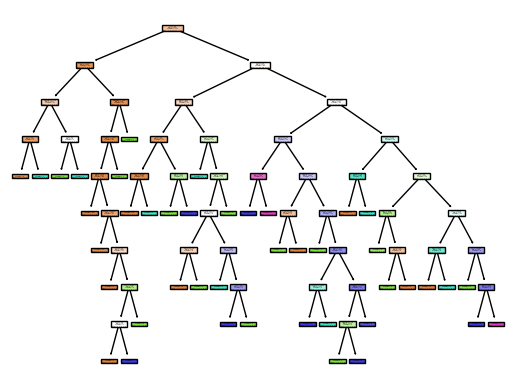

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.30      0.23      0.26        13
           2       0.33      0.43      0.38         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.48        60
   macro avg       0.27      0.30      0.28        60
weighted avg       0.44      0.48      0.46        60

Alpha: 0.0056179775280898875


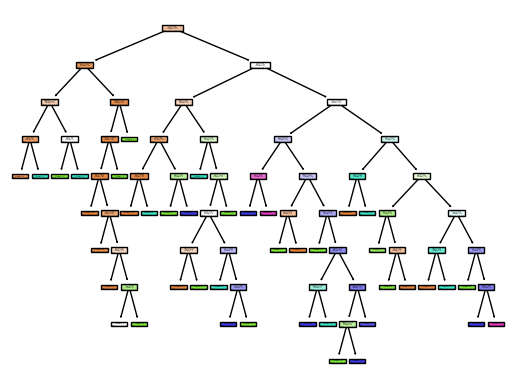

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.33      0.23      0.27        13
           2       0.33      0.43      0.38         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.48        60
   macro avg       0.28      0.30      0.28        60
weighted avg       0.45      0.48      0.46        60

Alpha: 0.007022471910112359


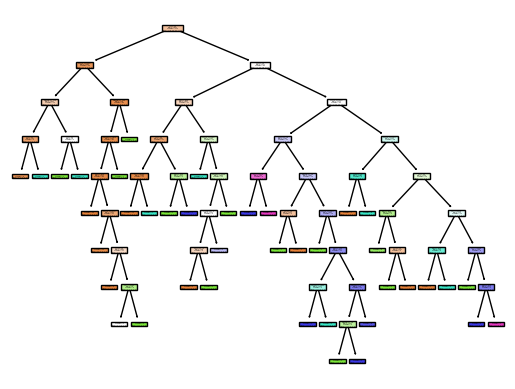

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.40      0.31      0.35        13
           2       0.30      0.43      0.35         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.50        60
   macro avg       0.28      0.31      0.29        60
weighted avg       0.46      0.50      0.47        60

Alpha: 0.007490636704119849


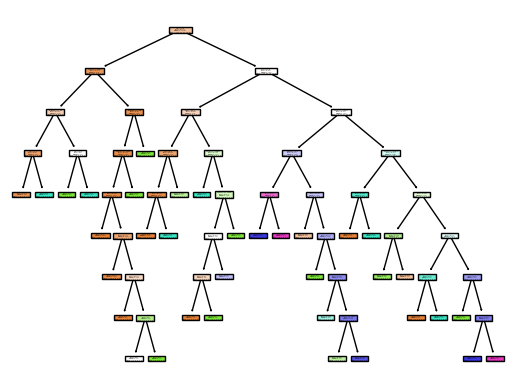

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.40      0.31      0.35        13
           2       0.30      0.43      0.35         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.50        60
   macro avg       0.28      0.31      0.29        60
weighted avg       0.46      0.50      0.47        60

Alpha: 0.007490636704119849


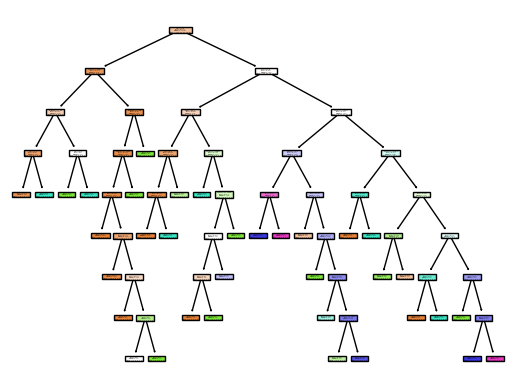

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.40      0.31      0.35        13
           2       0.30      0.43      0.35         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.50        60
   macro avg       0.28      0.31      0.29        60
weighted avg       0.46      0.50      0.47        60

Alpha: 0.007490636704119849


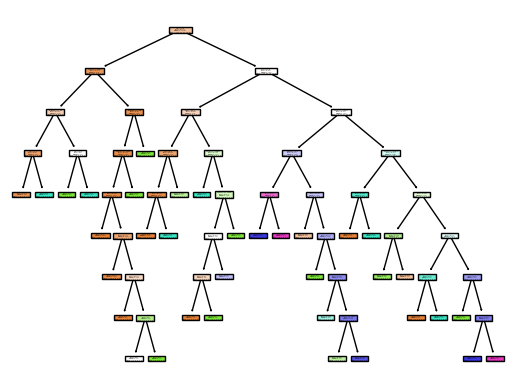

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.40      0.31      0.35        13
           2       0.30      0.43      0.35         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.50        60
   macro avg       0.28      0.31      0.29        60
weighted avg       0.46      0.50      0.47        60

Alpha: 0.007490636704119849


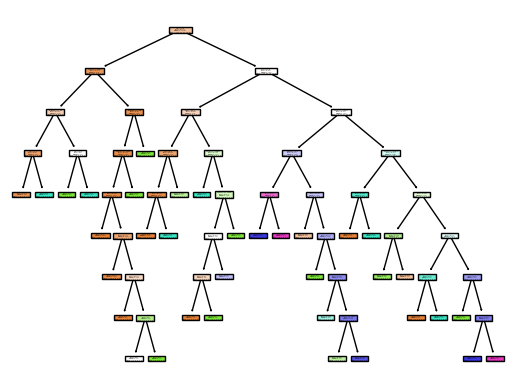

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.40      0.31      0.35        13
           2       0.30      0.43      0.35         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.50        60
   macro avg       0.28      0.31      0.29        60
weighted avg       0.46      0.50      0.47        60

Alpha: 0.007490636704119849


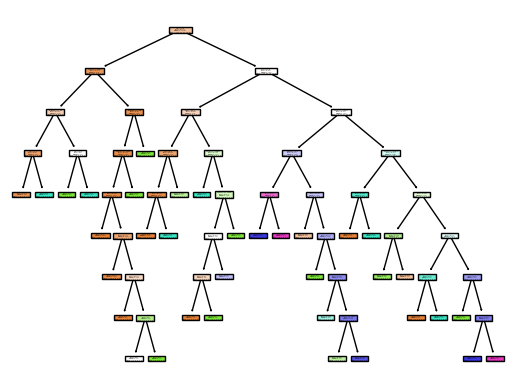

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.43      0.23      0.30        13
           2       0.30      0.43      0.35         7
           3       0.11      0.17      0.13         6
           4       0.00      0.00      0.00         6

    accuracy                           0.50        60
   macro avg       0.31      0.33      0.31        60
weighted avg       0.47      0.50      0.48        60

Alpha: 0.007865168539325843


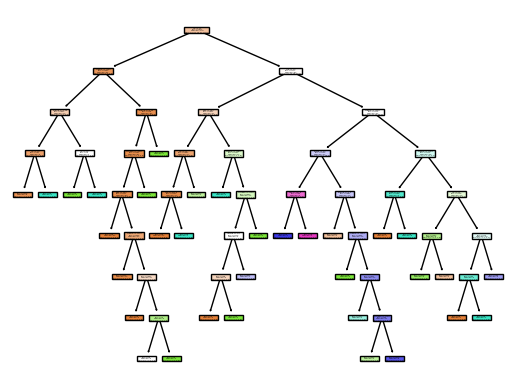

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        28
           1       0.38      0.23      0.29        13
           2       0.30      0.43      0.35         7
           3       0.11      0.17      0.13         6
           4       0.00      0.00      0.00         6

    accuracy                           0.48        60
   macro avg       0.30      0.32      0.30        60
weighted avg       0.46      0.48      0.46        60

Alpha: 0.008114856429463174


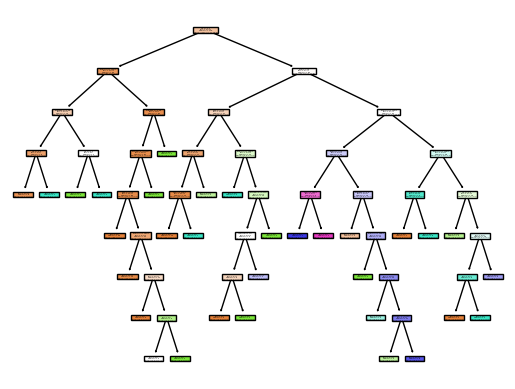

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        28
           1       0.29      0.15      0.20        13
           2       0.33      0.43      0.38         7
           3       0.09      0.17      0.12         6
           4       0.00      0.00      0.00         6

    accuracy                           0.47        60
   macro avg       0.28      0.31      0.29        60
weighted avg       0.44      0.47      0.45        60

Alpha: 0.008861690743713218


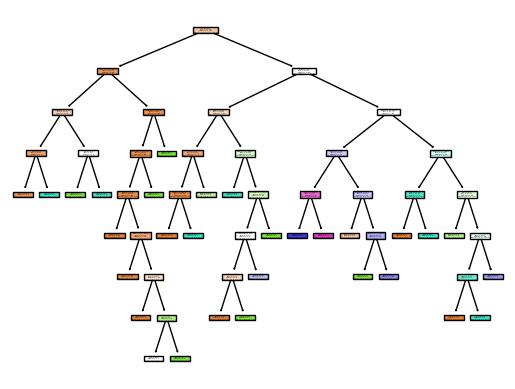

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        28
           1       0.29      0.15      0.20        13
           2       0.33      0.43      0.38         7
           3       0.09      0.17      0.12         6
           4       0.00      0.00      0.00         6

    accuracy                           0.47        60
   macro avg       0.28      0.31      0.29        60
weighted avg       0.44      0.47      0.45        60

Alpha: 0.00889513108614232


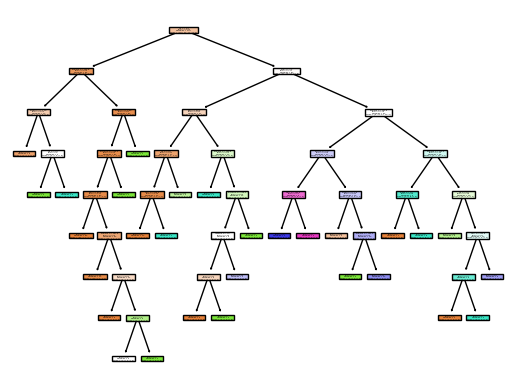

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.29      0.15      0.20        13
           2       0.30      0.43      0.35         7
           3       0.09      0.17      0.12         6
           4       0.00      0.00      0.00         6

    accuracy                           0.47        60
   macro avg       0.28      0.31      0.29        60
weighted avg       0.45      0.47      0.45        60

Alpha: 0.008988764044943818


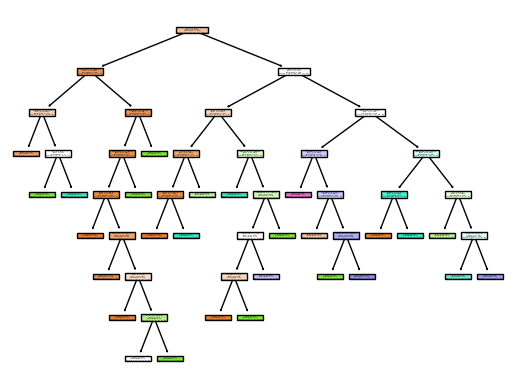

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.29      0.15      0.20        13
           2       0.30      0.43      0.35         7
           3       0.09      0.17      0.12         6
           4       0.00      0.00      0.00         6

    accuracy                           0.47        60
   macro avg       0.28      0.31      0.29        60
weighted avg       0.45      0.47      0.45        60

Alpha: 0.008988764044943818


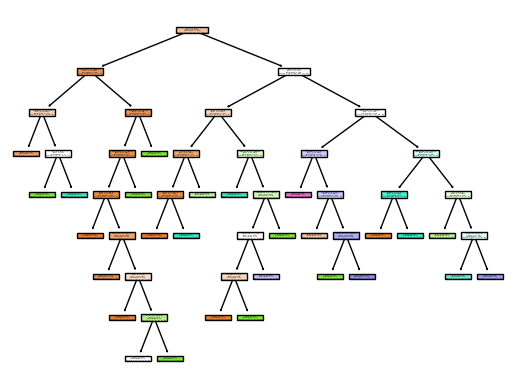

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.29      0.15      0.20        13
           2       0.27      0.43      0.33         7
           3       0.09      0.17      0.12         6
           4       0.00      0.00      0.00         6

    accuracy                           0.47        60
   macro avg       0.28      0.31      0.28        60
weighted avg       0.46      0.47      0.45        60

Alpha: 0.009987515605493134


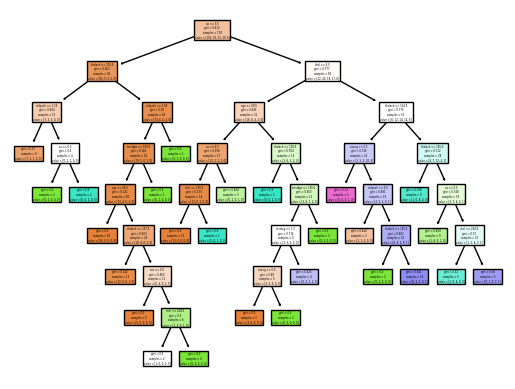

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.18      0.15      0.17        13
           2       0.27      0.43      0.33         7
           3       0.14      0.17      0.15         6
           4       0.00      0.00      0.00         6

    accuracy                           0.47        60
   macro avg       0.27      0.31      0.29        60
weighted avg       0.44      0.47      0.45        60

Alpha: 0.009987515605493135


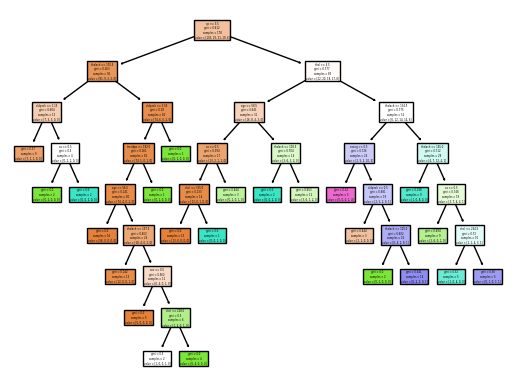

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.18      0.15      0.17        13
           2       0.27      0.43      0.33         7
           3       0.14      0.17      0.15         6
           4       0.00      0.00      0.00         6

    accuracy                           0.47        60
   macro avg       0.27      0.31      0.29        60
weighted avg       0.44      0.47      0.45        60

Alpha: 0.010433386837881222


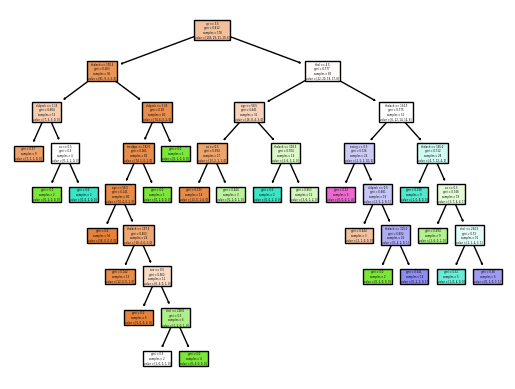

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.25      0.15      0.19        13
           2       0.27      0.43      0.33         7
           3       0.14      0.17      0.15         6
           4       0.00      0.00      0.00         6

    accuracy                           0.48        60
   macro avg       0.28      0.31      0.29        60
weighted avg       0.44      0.48      0.45        60

Alpha: 0.011128795384755918


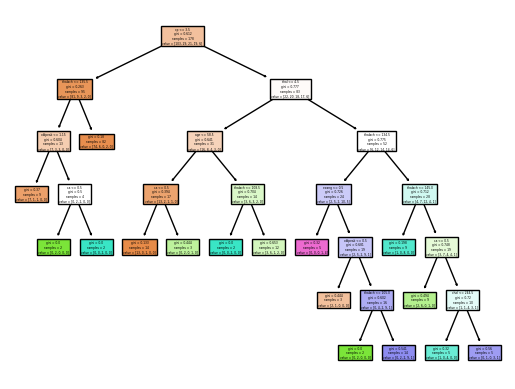

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.22      0.15      0.18        13
           2       0.30      0.43      0.35         7
           3       0.14      0.17      0.15         6
           4       0.00      0.00      0.00         6

    accuracy                           0.48        60
   macro avg       0.28      0.31      0.29        60
weighted avg       0.43      0.48      0.45        60

Alpha: 0.011235955056179775


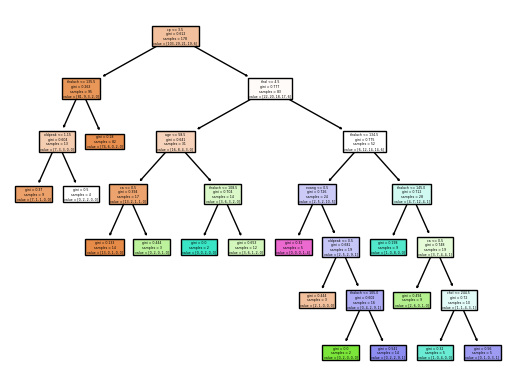

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.12      0.08      0.10        13
           2       0.30      0.43      0.35         7
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         6

    accuracy                           0.47        60
   macro avg       0.25      0.30      0.27        60
weighted avg       0.41      0.47      0.43        60

Alpha: 0.011355636281715518


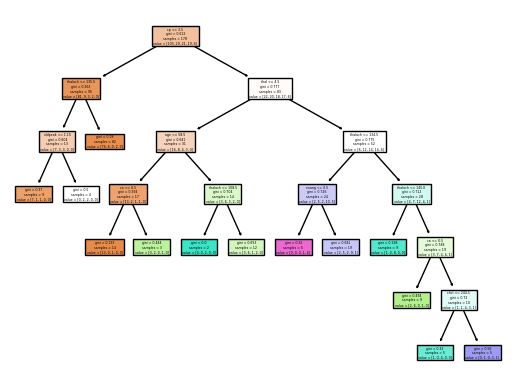

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.11      0.08      0.09        13
           2       0.22      0.29      0.25         7
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         6

    accuracy                           0.45        60
   macro avg       0.24      0.27      0.25        60
weighted avg       0.40      0.45      0.42        60

Alpha: 0.011369716425896202


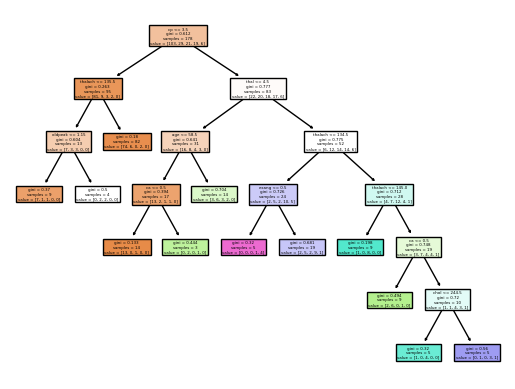

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.71      0.86      0.77        28
           1       0.14      0.08      0.10        13
           2       0.22      0.29      0.25         7
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         6

    accuracy                           0.47        60
   macro avg       0.24      0.28      0.25        60
weighted avg       0.40      0.47      0.43        60

Alpha: 0.013714403850129578


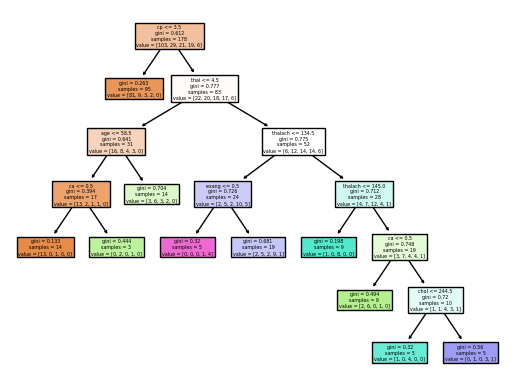

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.71      0.86      0.77        28
           1       0.15      0.15      0.15        13
           2       0.17      0.14      0.15         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.45        60
   macro avg       0.21      0.23      0.22        60
weighted avg       0.38      0.45      0.41        60

Alpha: 0.01507326368355345


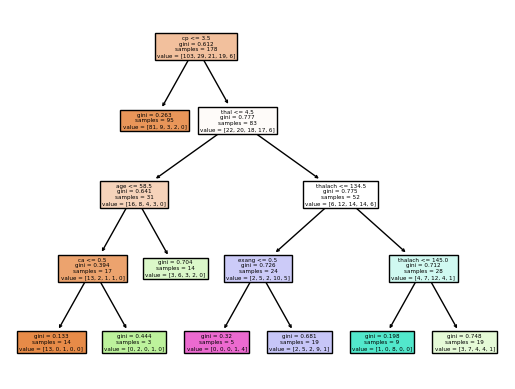

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.71      0.86      0.77        28
           1       0.15      0.15      0.15        13
           2       0.17      0.14      0.15         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.45        60
   macro avg       0.21      0.23      0.22        60
weighted avg       0.38      0.45      0.41        60

Alpha: 0.016119653065247402


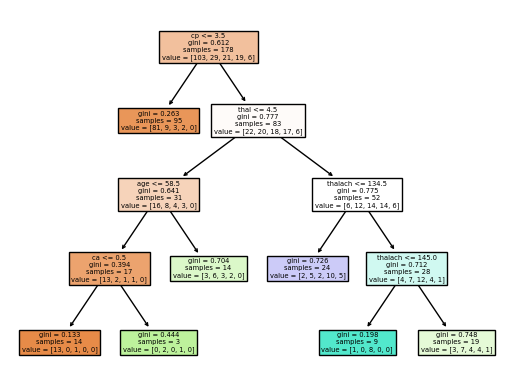

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.68      0.96      0.79        28
           1       0.14      0.08      0.10        13
           2       0.17      0.14      0.15         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.48        60
   macro avg       0.20      0.24      0.21        60
weighted avg       0.37      0.48      0.41        60

Alpha: 0.019166709815495606


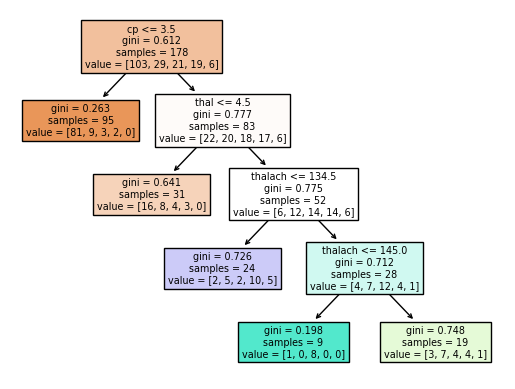

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.68      0.96      0.79        28
           1       0.00      0.00      0.00        13
           2       0.20      0.57      0.30         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.52        60
   macro avg       0.17      0.31      0.22        60
weighted avg       0.34      0.52      0.41        60

Alpha: 0.019389667268141536


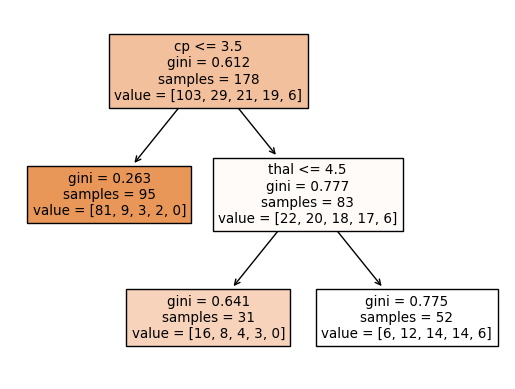

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        28
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.47        60
   macro avg       0.09      0.20      0.13        60
weighted avg       0.22      0.47      0.30        60

Alpha: 0.024446406923033293


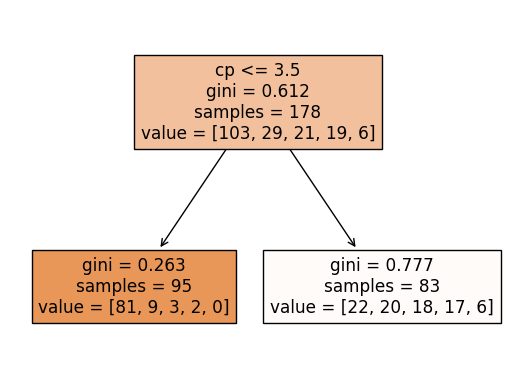

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        28
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.47        60
   macro avg       0.09      0.20      0.13        60
weighted avg       0.22      0.47      0.30        60

Alpha: 0.10948765860590526


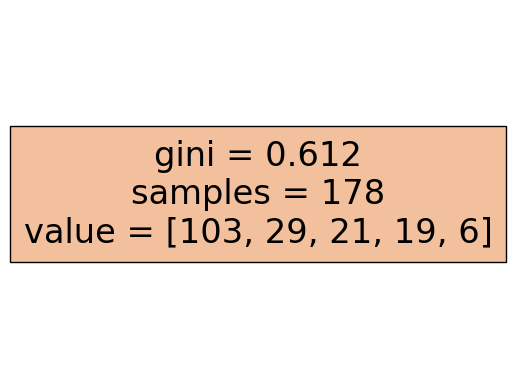

In [61]:
'''
    Plot trees for all cpps in calculated list of ccps.
'''
clfs = []
for ccp in ccp_alphas:
    pruned = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp)
    pruned_model = pruned.fit(train_x, train_y)
    pruned_predict = pruned_model.predict(test_x)
    clfs.append(pruned)
    print('Decision Tree Classifier Classification Repoprt: ')
    print(classification_report(test_y, pruned_predict))
    print("Alpha: " + str(ccp))
    plot_tree(pruned, filled=True, feature_names=X.columns)
    plt.show()

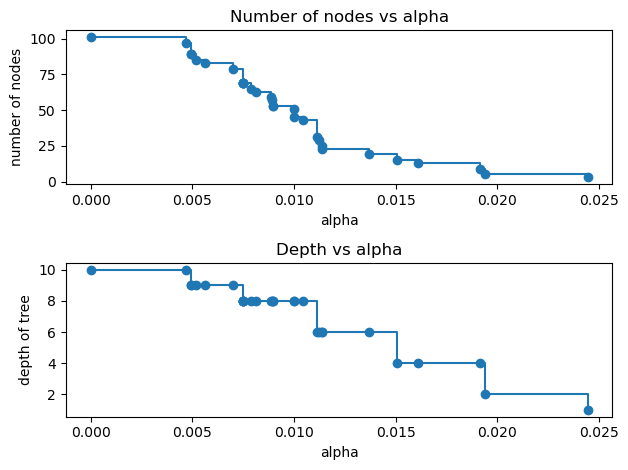

In [62]:
'''
    Output graphs showing comparison between number of nodes per alpha and the depth of
    the tree for each calculated alpha.
'''

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

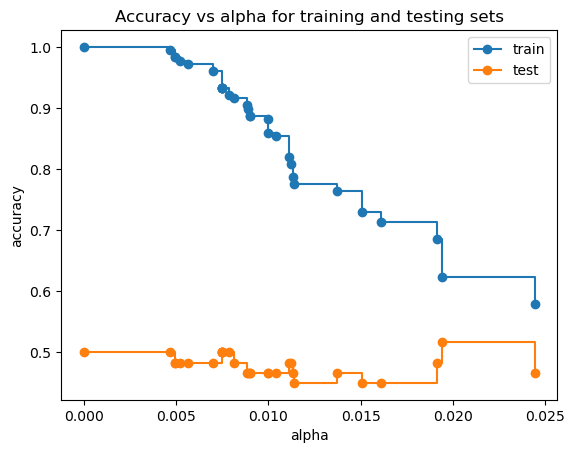

In [63]:
train_scores = [clf.score(train_x, train_y) for clf in clfs]
test_scores = [clf.score(test_x, test_y) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

The above graph shows the relationship between accuracy and alpha. We can see that there is quite a difference between the training and testing data accuracy, without any pruining we can see that the model performs with 50% accuracy. As pruning continues we can see that the accuracy dips off until the alpha is 0.0193. At this point we see a slight improvement in the accuracy. One interesting note about the tree is how one sided it is, it quickly identifies if something will meet the requirements based off of cp, thal, and thalach. If these values are above a certain amount it will continue the search if not it will terminate.

5. **[5 points]** Tune either a random forest or XGBoost classifier, and justify your choice of 1 algorithm over the other.


I have decided to use an XGBoost model over a random forest model because I have used it in the past. In addition to this, because of the poor performance with the standard
decision trees from above, I was curious if the XGBoost model would be able to acheive better
performance with this data.

In [64]:
xgb_model = xgb.XGBClassifier()

xgb_model.fit(train_x, train_y)

xgb_predict = xgb_model.predict(test_x)
xgb_accuracy = accuracy_score(test_y, xgb_predict)
print("XGBoost Untuned Model Accuracy: " + str(xgb_accuracy))


XGBoost Untuned Model Accuracy: 0.5


## Tuning XGBoost Model

In [65]:
parameter = {
    "learning_rate": [0.1, 0.3, 0.5],
    "max_depth": [3, 5, 7],
}

xgb_model = xgb.XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameter)
grid_search.fit(train_x, train_y)

best_parameters = grid_search.best_params_

print("Best Parameters: " + str(best_parameters))

best_model = grid_search.best_estimator_
xgb_predict = best_model.predict(test_x)
xgb_accuracy = accuracy_score(test_y, xgb_predict)
print("XGBoost Untuned Model Accuracy: " + str(xgb_accuracy))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3}
XGBoost Untuned Model Accuracy: 0.5333333333333333


With tuning, we can see a very slight improvment in the performance of the XGBoost model.

6. **[5 points]** Compute feature importance metrics by both mean decrease in impurity and by permutation importance. Which features do these two metrics and the plotted tree from Problem 4 agree are important? Does this seem practically meaningful?


In [66]:
from sklearn.inspection import permutation_importance

feature_importance = best_model.feature_importances_

result = permutation_importance(best_model, X, y, n_repeats=10, random_state=0)
perm_importance = result.importances_mean

features = X.columns

for i in range(len(features)):
    print("Feature Name: " + str(features[i]).capitalize() + ", Feature Importance: " + str(feature_importance[i]) + ", Permutation Performance: " + str(perm_importance[i]))


Feature Name: Age, Feature Importance: 0.050325442, Permutation Performance: 0.05742574257425748
Feature Name: Sex, Feature Importance: 0.0651609, Permutation Performance: 0.013531353135313595
Feature Name: Cp, Feature Importance: 0.2655623, Permutation Performance: 0.05643564356435647
Feature Name: Trestbps, Feature Importance: 0.04796603, Permutation Performance: 0.04224422442244228
Feature Name: Chol, Feature Importance: 0.056102797, Permutation Performance: 0.0643564356435644
Feature Name: Fbs, Feature Importance: 0.034264553, Permutation Performance: -0.0003300330033003118
Feature Name: Restecg, Feature Importance: 0.05457628, Permutation Performance: 0.010231023102310288
Feature Name: Thalach, Feature Importance: 0.0654656, Permutation Performance: 0.07095709570957101
Feature Name: Exang, Feature Importance: 0.075058214, Permutation Performance: 0.016501650165016556
Feature Name: Oldpeak, Feature Importance: 0.05568706, Permutation Performance: 0.058085808580858135
Feature Name: 

According to the results above, we can see that Cp, Thal, Exang, Fbs, Slope, and Sex are important metrics in the decision making process. However, based on the tree from Question 4 we can see that that model is heavily influence by Cp, Thal, and Thalch. We can see that the metrics and the tree from Querstion 4 share the belief that Cp and Thal hold significant influence over the decision making. This does seem meaningful in the decision making process, with the test data we can see that these metrics contributed to the best performing model.

## Mushrooms. Edible or Poisonous?

In [67]:
'''
    Read in data from UCI reposityory.
'''
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 

X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


7. **[5 points]** Preprocess the data into a form for use for classification. Note most features are categorical and will need to be modified into numerical representations.


In [69]:
x_copy = X.copy()

x_copy.replace('?', np.nan, inplace=True)
x_cleaned = x_copy.dropna()

x_copy['poisonous'] = y
x_copy = pd.get_dummies(x_copy, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
 'population', 'habitat', 'poisonous'], drop_first=True) 

x_copy = x_copy.replace({True: 1, False: 0})

y_cleaned = x_copy['poisonous_p']
x_cleaned = x_copy.drop("poisonous_p", axis=1)

train_x, test_x, train_y, test_y = train_test_split(x_cleaned, y_cleaned, test_size=0.4, random_state=0)
val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.5, random_state=0)


x_cleaned

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


8. **[5 points]** Train a decision tree classifier to classify which mushrooms are poisonous and test it on a test set.

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       789

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



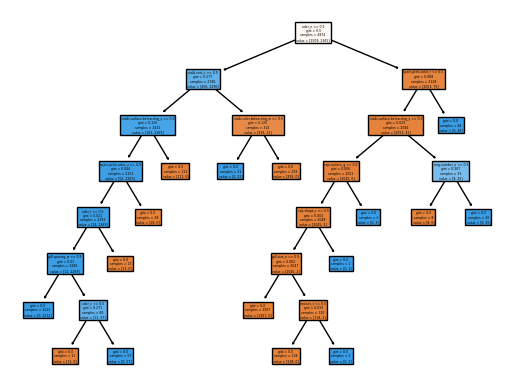

In [70]:
dtc = DecisionTreeClassifier(random_state=0)
model = dtc.fit(train_x, train_y)
predict = model.predict(test_x)


print('Decision Tree Classifier Classification Repoprt: ')
print(classification_report(test_y, predict))
plot_tree(dtc, filled=True, feature_names=x_cleaned.columns)
plt.savefig("mushtree.png")
plt.show()

9. **[5 points]** Use cost-complexity pruning to simplify your tree as much as possible to maintain high validation accuracy and plot tree diagrams. Discuss what is intuitive (or not intuitive) about the trained model's decisionmaking process.

In [71]:
'''
    Calculating alphas and impurties from training data.
'''

path = dtc.cost_complexity_pruning_path(train_x, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

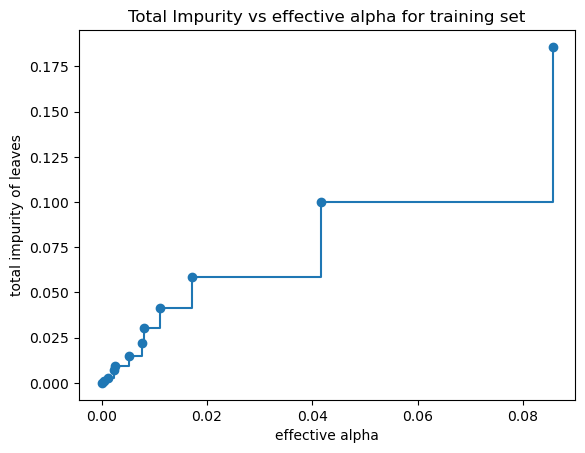

In [72]:
# plotting the impurities for different alphas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       789

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Alpha: 0.0


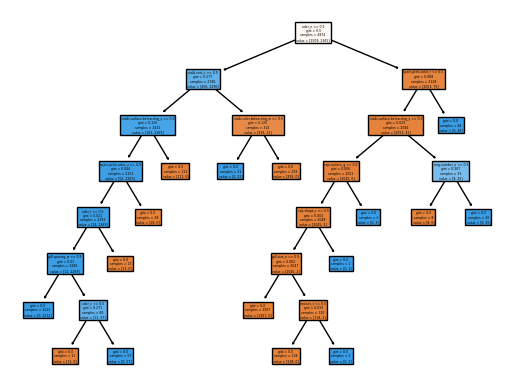

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       789

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Alpha: 0.000409739497845712


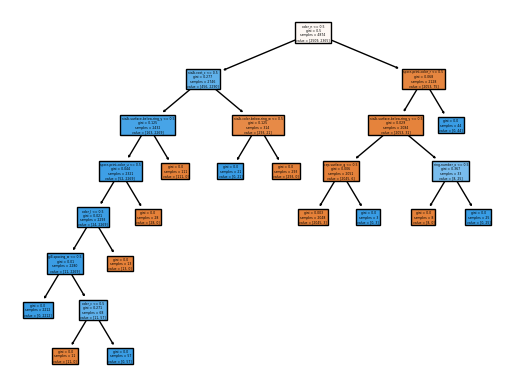

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       789

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Alpha: 0.0012256225349992363


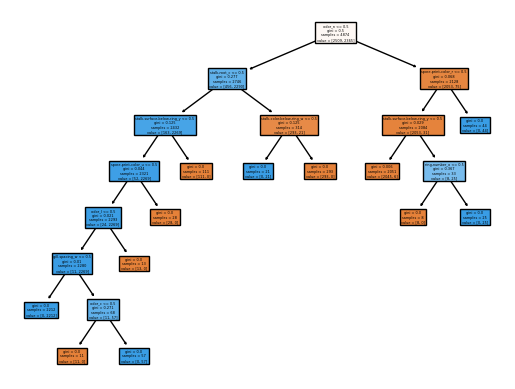

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       836
           1       0.99      1.00      1.00       789

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Alpha: 0.002245984781403649


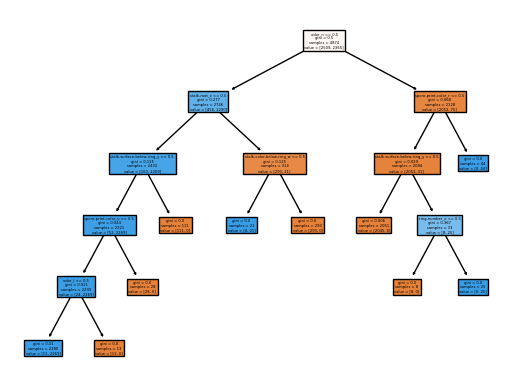

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       836
           1       0.99      1.00      1.00       789

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Alpha: 0.0024869126223250144


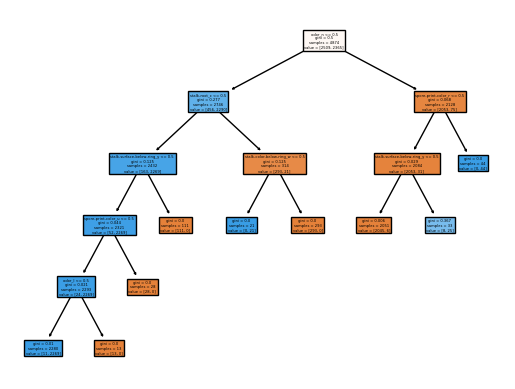

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       836
           1       0.99      1.00      0.99       789

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Alpha: 0.005253127153555351


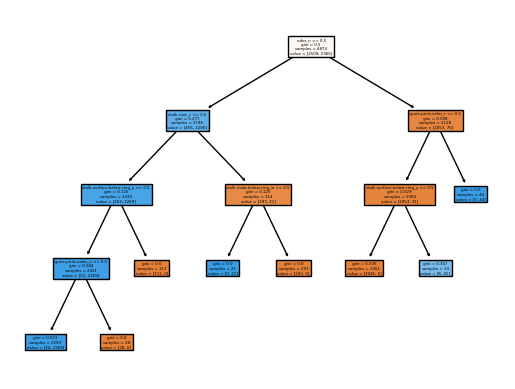

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       836
           1       0.99      0.99      0.99       789

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Alpha: 0.007589583059183777


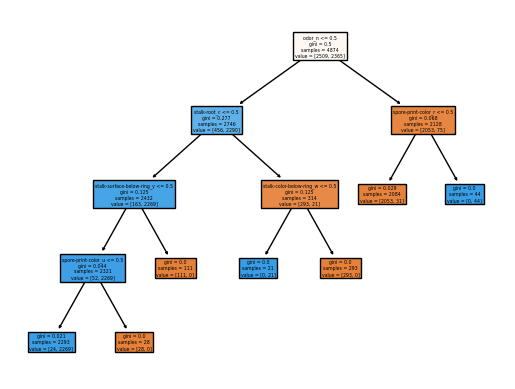

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       836
           1       0.99      0.98      0.98       789

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

Alpha: 0.008040845876599867


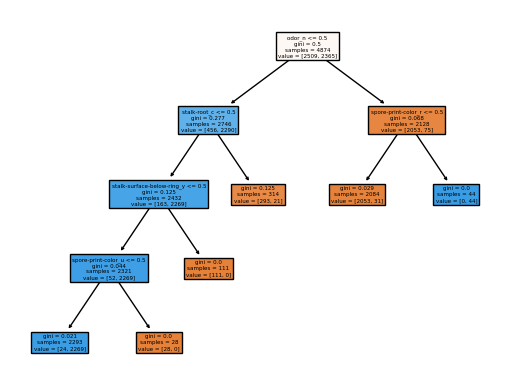

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       836
           1       0.97      0.98      0.98       789

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

Alpha: 0.011114560616543761


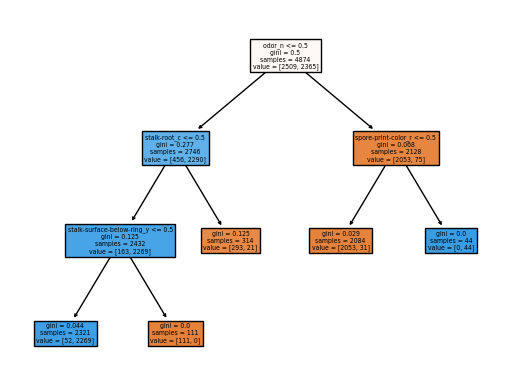

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       836
           1       0.97      0.96      0.97       789

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

Alpha: 0.017159542622056094


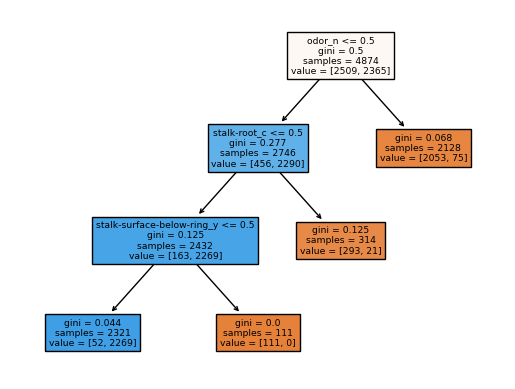

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       836
           1       0.93      0.96      0.95       789

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Alpha: 0.04154298801404736


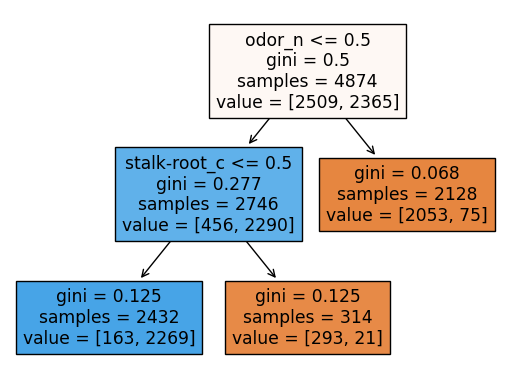

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       836
           1       0.83      0.97      0.89       789

    accuracy                           0.89      1625
   macro avg       0.90      0.89      0.89      1625
weighted avg       0.90      0.89      0.89      1625

Alpha: 0.0855994986022115


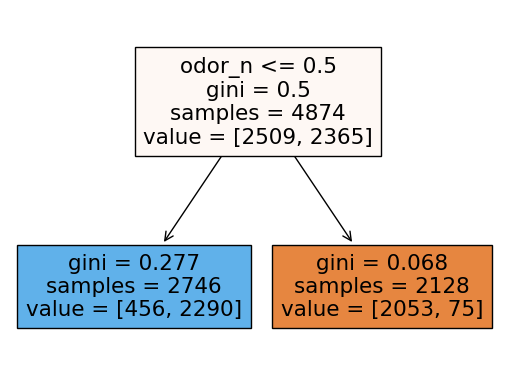

Decision Tree Classifier Classification Repoprt: 
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       836
           1       0.00      0.00      0.00       789

    accuracy                           0.51      1625
   macro avg       0.26      0.50      0.34      1625
weighted avg       0.26      0.51      0.35      1625

Alpha: 0.3138296914534114


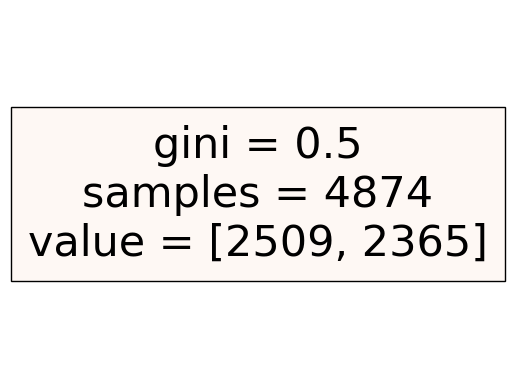

In [73]:
'''
    Plot trees for all cpps in calculated list of ccps.
'''
clfs = []
for ccp in ccp_alphas:
    pruned = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp)
    pruned_model = pruned.fit(train_x, train_y)
    pruned_predict = pruned_model.predict(test_x)
    clfs.append(pruned)
    print('Decision Tree Classifier Classification Repoprt: ')
    print(classification_report(test_y, pruned_predict))
    print("Alpha: " + str(ccp))
    plot_tree(pruned, filled=True, feature_names=x_cleaned.columns)
    plt.show()


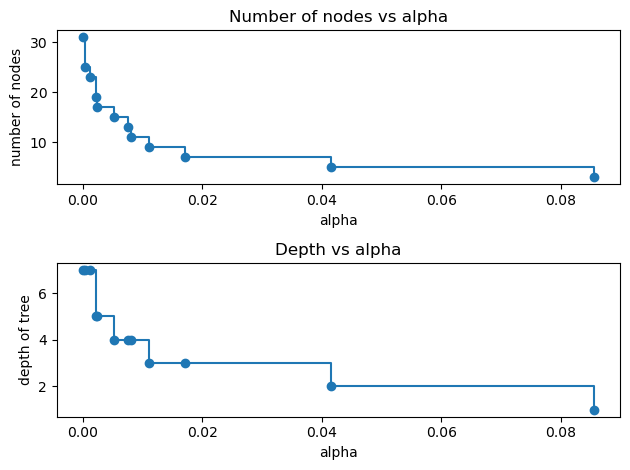

In [74]:
'''
    Output graphs showing comparison between number of nodes per alpha and the depth of
    the tree for each calculated alpha.
'''

clfs = clfs[:-1]    # Dropping last model because it is useless.
ccp_alphas = ccp_alphas[:-1]    # Dropping last value because it is useless.

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

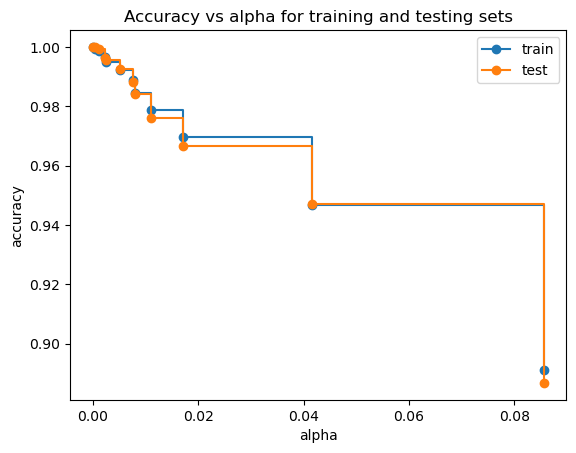

In [75]:
train_scores = [clf.score(train_x, train_y) for clf in clfs]
test_scores = [clf.score(test_x, test_y) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

The above graph shows the relationsip between accuracy and alpha, we can see the the training and testing accuracy are very closely related for each value of alpha. However, because of the performance on the testing data the best alpha for this model is 0. Although this does not offer any sort of pruning on the tree is delivers the best output performance which is justification enough for not having a pruned tree. This makes sense with regards to the performance of the tree because it allows so many different paths and decisions the model can make increasing the likelyhood that the results are more correct.


10. **[10 points]** Train a XGBoost model to predict which mushrooms are poisonous and test it on a test set. Tune its hyperparameters to improve performance.

In [76]:
'''
    Training XGBoost model with default parameters.
'''

xgb_model = xgb.XGBClassifier()

xgb_model.fit(train_x, train_y) # train model

xgb_predict = xgb_model.predict(test_x)
xgb_accuracy = accuracy_score(test_y, xgb_predict)
print("XGBoost Untuned Model Accuracy: " + str(xgb_accuracy))


XGBoost Untuned Model Accuracy: 1.0


In [77]:
'''
    Create dictionary of parameters for gridsearch.
'''

parameter = {
    "learning_rate": [0.1, 0.3, 0.5],
    "max_depth": [3, 5, 7],
}

xgb_model = xgb.XGBClassifier()

'''
    Using grid search to find optimal parameters from the parameter dictionary.

    GridSearchCV allows for efficient training and testing of model, including outputting the
    best performing model and parameters associated with the model.

'''
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameter)
grid_search.fit(train_x, train_y)   # train model

best_parameters = grid_search.best_params_  # return parameters for best performing model

print("Best Parameters: " + str(best_parameters))

best_model = grid_search.best_estimator_
xgb_predict = best_model.predict(test_x)
xgb_accuracy = accuracy_score(test_y, xgb_predict)
print("XGBoost Untuned Model Accuracy: " + str(xgb_accuracy))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3}
XGBoost Untuned Model Accuracy: 1.0
